# 6.4 在线性回归模型中使用梯度下降法

## 6.4.1 梯度下降法的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x *2. +4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1)

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

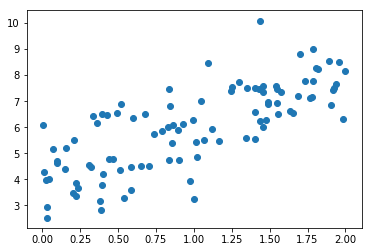

In [6]:
plt.scatter(x, y)
plt.show()

## 使用梯度下降法训练
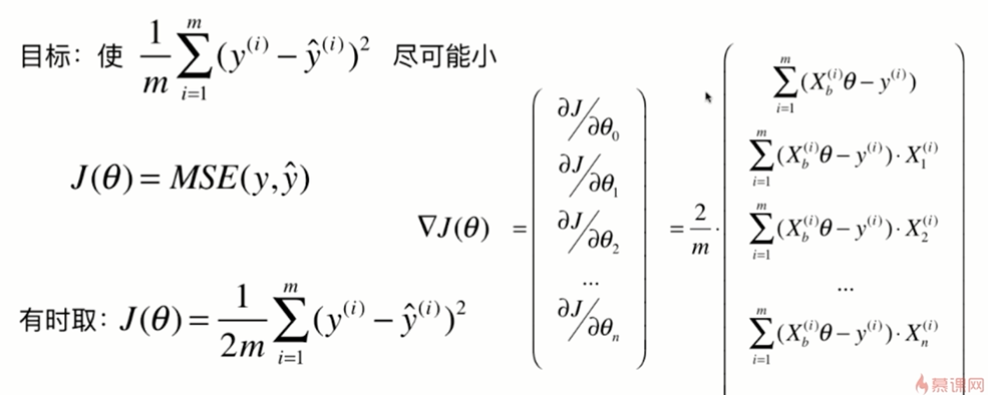

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [8]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    #第0个元素可以单独简单处理
    res[0] = np.sum(X_b.dot(theta) - y)
    #其余的均与取出的第i个特征计算
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    #theta_history.append(initial_theta)
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        #theta_history.append(theta)
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        i_iter += 1
        
    return theta

In [10]:
#在X加一列，默认都为1
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [11]:
# 一开始设置的函数为  y = 4 + 2*x
theta

array([4.0214594 , 2.00706148])

## 6.4.2 梯度下降法的封装

In [12]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([2.00706148])

In [14]:
lin_reg.intercept_

4.02145939680064